## Logistic Regression

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('../../../data/processed/tokenized_data_sample_with_custom_stopwords.csv')

# Load the vectorized features from the .npy file
vectorized_features = np.load('../../../data/processed/sample_vectorized_features_with_custom_stopwords_word2vec.npy')

feature_vectors = pd.DataFrame(vectorized_features)


feature_vectors.columns = [f'vec_feature_{i}' for i in range(feature_vectors.shape[1])]

X = feature_vectors # Feature vector
y = df['overall']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

In [37]:
# Calculate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.38      0.13      0.19      1202
         2.0       0.00      0.00      0.00       769
         3.0       0.32      0.03      0.05      1131
         4.0       0.29      0.02      0.03      1682
         5.0       0.54      0.98      0.70      5216

    accuracy                           0.53     10000
   macro avg       0.31      0.23      0.19     10000
weighted avg       0.41      0.53      0.40     10000



C:\Users\lucym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lucym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lucym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

C:\Users\lucym\AppData\Local\Temp\ipykernel_15968\4192109607.py:7: RuntimeWarning: invalid value encountered in divide
  conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)


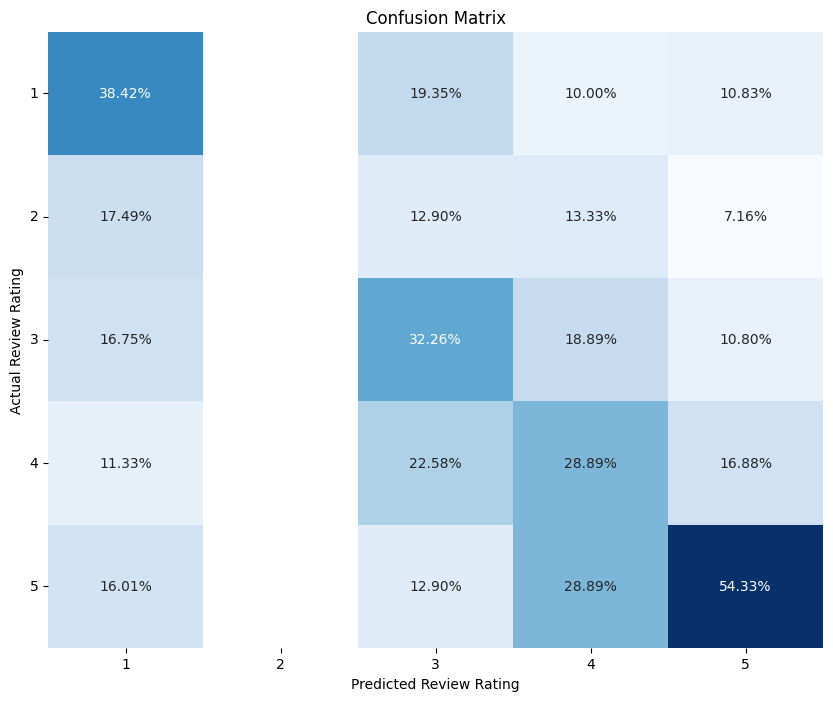

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


## Logistic Regression (w/ class weighting)

In [39]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# Initialize and train the logistic regression model with class weights
model = LogisticRegression(class_weight=class_weights, solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(class_weight={1.0: 1.5838447832112452,
                                 2.0: 2.733173898189272,
                                 3.0: 1.7989655947829997,
                                 4.0: 1.1904761904761905,
                                 5.0: 0.383601054902901},
                   solver='liblinear')

In [40]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.27      0.40      0.32      1202
         2.0       0.13      0.04      0.06       769
         3.0       0.21      0.24      0.23      1131
         4.0       0.29      0.09      0.13      1682
         5.0       0.64      0.77      0.70      5216

    accuracy                           0.49     10000
   macro avg       0.31      0.31      0.29     10000
weighted avg       0.45      0.49      0.46     10000



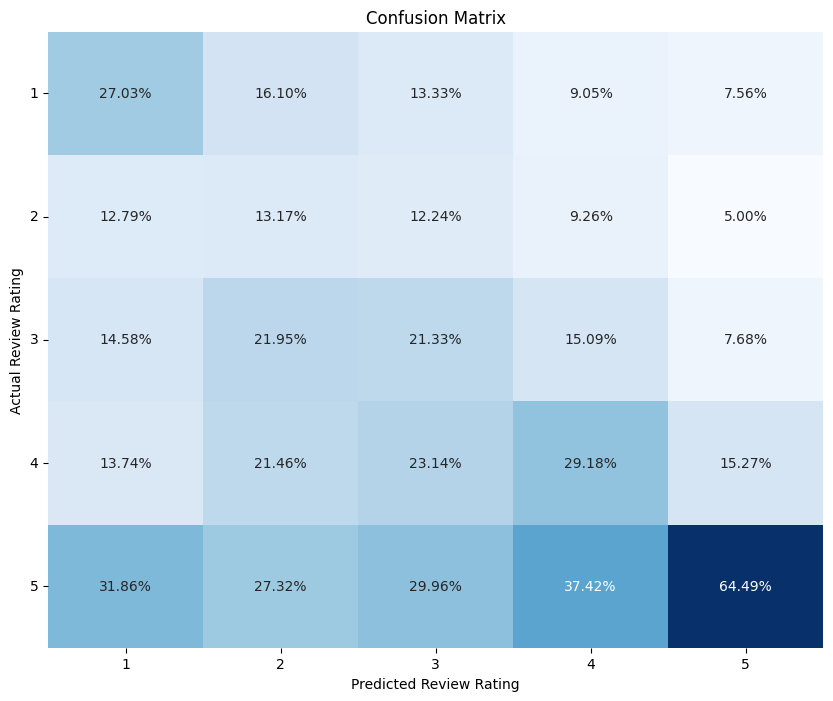

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


## Logistic Regression (w/ undersampling the majority class)

In [42]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class (5-star reviews) automatically
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test set
y_pred2 = model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         1.0       0.24      0.47      0.32      1202
         2.0       0.11      0.16      0.13       769
         3.0       0.20      0.28      0.23      1131
         4.0       0.23      0.21      0.22      1682
         5.0       0.74      0.48      0.59      5216

    accuracy                           0.39     10000
   macro avg       0.30      0.32      0.30     10000
weighted avg       0.48      0.39      0.42     10000



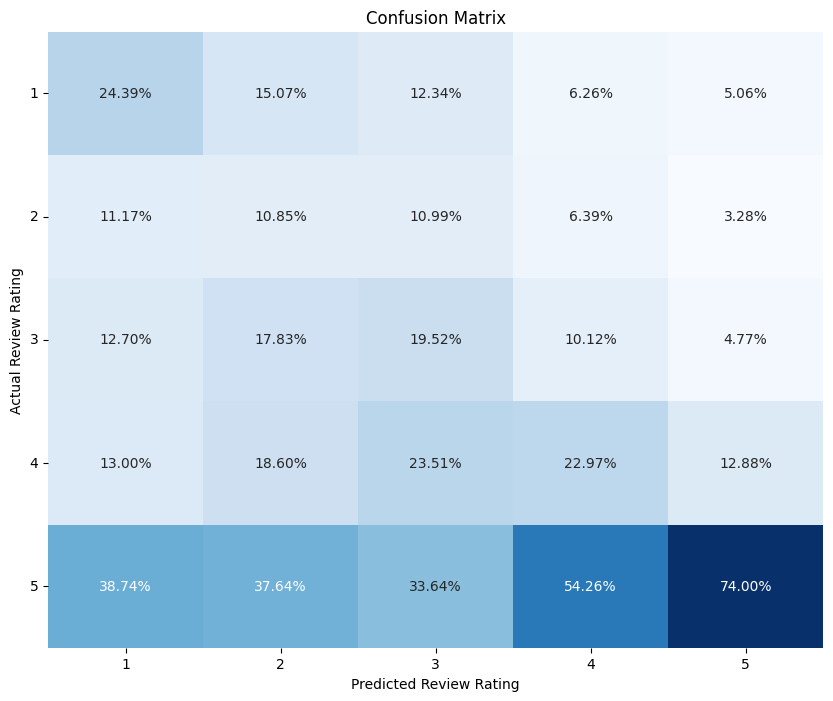

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


## Logistic Regression (w/ oversampling minority classes)

In [45]:
from imblearn.over_sampling import RandomOverSampler

# Oversample the minority classes (1 to 4-star reviews) automatically
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test set
y_pred3 = model.predict(X_test)


In [46]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         1.0       0.27      0.46      0.34      1202
         2.0       0.11      0.17      0.13       769
         3.0       0.20      0.28      0.23      1131
         4.0       0.25      0.23      0.24      1682
         5.0       0.74      0.51      0.60      5216

    accuracy                           0.40     10000
   macro avg       0.31      0.33      0.31     10000
weighted avg       0.49      0.40      0.43     10000



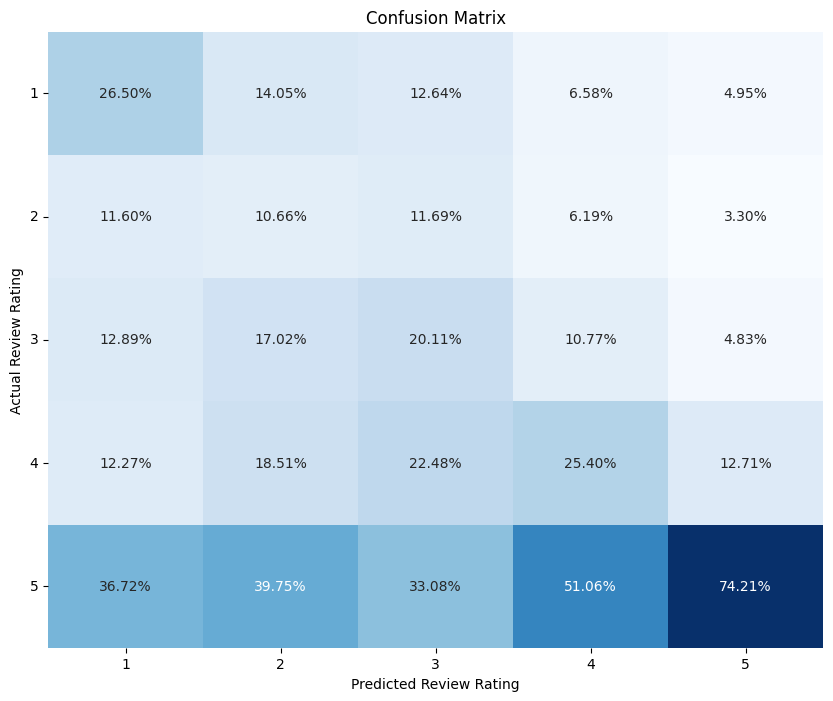

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


## Logistic Regression (w/ SMOTE sampling technique)

In [48]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.26      0.48      0.34      1202
         2.0       0.10      0.16      0.13       769
         3.0       0.20      0.28      0.24      1131
         4.0       0.26      0.23      0.24      1682
         5.0       0.75      0.50      0.60      5216

    accuracy                           0.40     10000
   macro avg       0.31      0.33      0.31     10000
weighted avg       0.50      0.40      0.43     10000



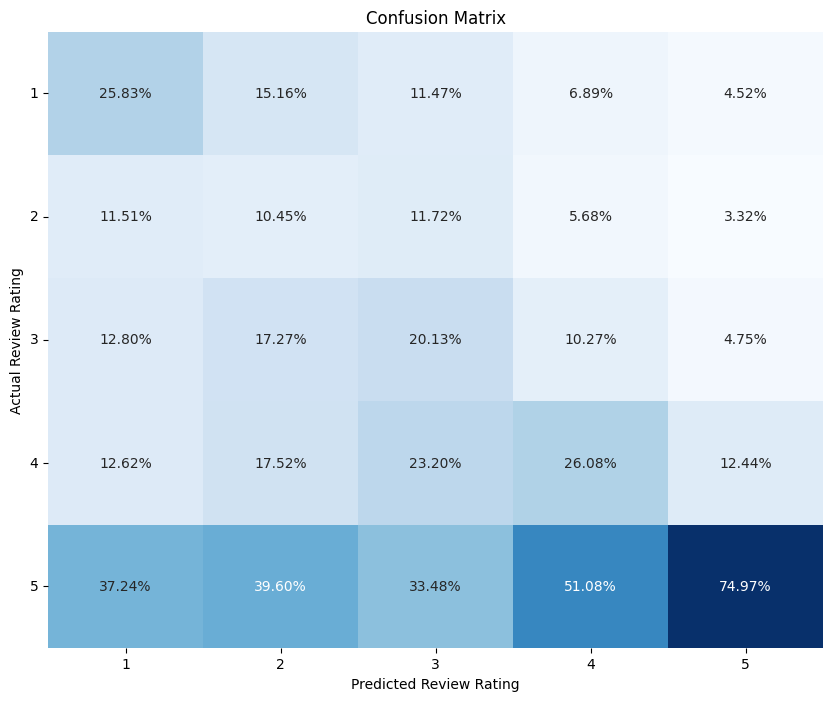

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()
